In [33]:
import numpy as np
import pandas as pd

In [5]:
from single_cell_multimodal_core.data_handling import load_sparse
from sklearn.metrics.pairwise import manhattan_distances

In [2]:
train_cite_input = load_sparse(split='train', problem='cite', type='inputs')

In [3]:
train_cite_input_b = train_cite_input > 0
list_of_sparse_row_b = [e for e in train_cite_input_b]
list_of_tuple_sparse_row_b = [tuple(e.indices) for e in train_cite_input_b]

In [4]:
set_of_sparse_row_b = set(list_of_tuple_sparse_row_b)
len(set_of_sparse_row_b)

70988

is not direct to derive clusterisation of input sample by the distribution of non-zero elements, we can try manhattan distance to assess closeness of input rows

In [6]:
m_1 = [manhattan_distances(e, train_cite_input_b[0]) for e in train_cite_input_b]

In [18]:
m_1 = np.array(m_1)

In [7]:
max(m_1)

array([[5339.]])

In [32]:
min(m_1[m_1 > 0])

2983.0

In [28]:
mean_md_1 = np.mean(m_1)

In [29]:
np.median(m_1)

3697.0

In [30]:
np.std(m_1)

349.0980175918325

In [31]:
len(m_1[m_1 < 3747])

39366

m_d = [[manhattan_distances(e_1, e_2) for e_1 in train_cite_input_b[i:]] for i, e_2 in tqdm.tqdm(enumerate(train_cite_input_b))]

using manhattan distance is not computationally feasible

can we exploit ordering?

<AxesSubplot: >

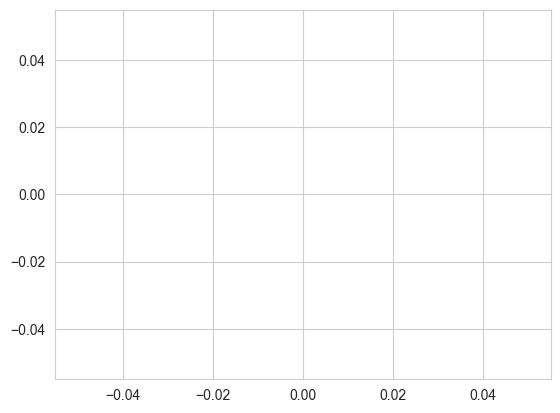

In [36]:
pd.Series(m_1[0][0]).plot()